# Group Colab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("./drive/MyDrive/data.csv", on_bad_lines='skip')

In [ ]:
# @title Data Cleaning
maps = []
for feat in ["protocol_type", "service", "flag", "class"]:
  map = {}
  for i in range(len(list(df[feat].unique()))):
    val = list(df[feat].unique())[i]
    map[val] = i
  df[feat].replace(map, inplace=True)
  print(map)

for feat in list(df.columns):
  for val in list(df[feat].unique()):
    map = {}
    try:
      if type(val) != int:
        map = {val: int(val)}
        map = {val: float(val)}
    except :
      map = {val: 0.0}
    df[feat].replace(map, inplace=True)

df["same_srv_rate"].fillna(0)


{0: 0, 1: 1, 2: 2}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22}


0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
494016    1.0
494017    1.0
494018    1.0
494019    1.0
494020    1.0
Name: same_srv_rate, Length: 494021, dtype: float64

In [ ]:
# @title Forming Training and Testing Data

# First zip the columns of the dataset and split into data and labels
cols = [list(df[col]) for col in df.columns]
zipped = list(zip(*cols))
X = [row[:-1] for row in zipped]
y = [row[-1] for row in zipped]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

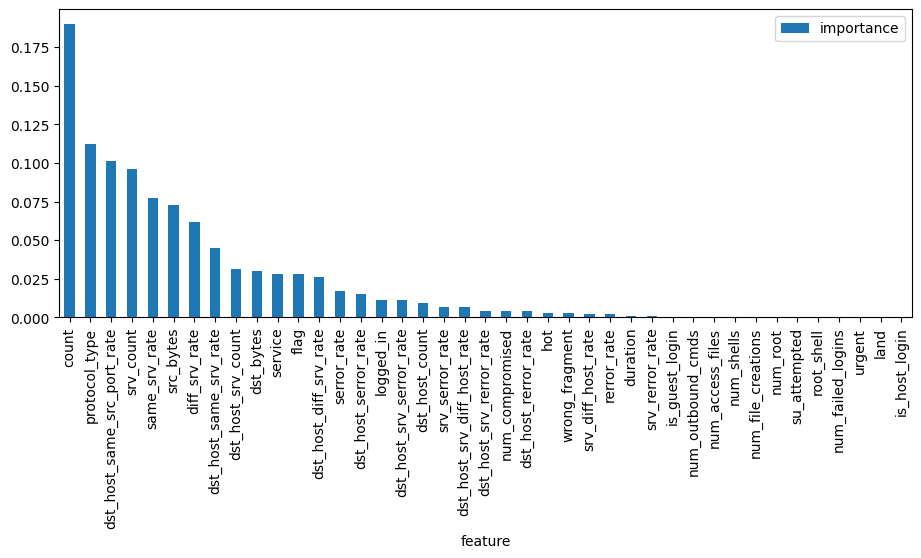

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier();

# fit random forest classifier on the training set
forest.fit(X_train, y_train);
# extract important features
score = np.round(forest.feature_importances_,3)
importances_dict = {'feature':list(df.columns[:-1]),'importance':score}
importances = pd.DataFrame({'feature':list(df.columns[:-1]),'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
print(importances_dict)

{'feature': ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], 'importance': array([0.001, 0.112, 0.028, 0.028, 0.073, 0.03 , 0.   , 0.003, 0.   ,
       0.003, 0.   , 0.011, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.19 , 0.096, 0.017, 0.007, 0.002,
       0.001, 0.077, 0.062, 0.002,